<a href="https://colab.research.google.com/github/plaban1981/Handle-Imbalanced-Datasets-Techniques/blob/master/Underwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Context

Underwriting (UW) is perhaps one of the most critical functions of Insurance Industry. Significant amount of cost and efforts are dedicated for this. With the advent of widespread use of Artificial Intelligence, there has been lot of interest in leveraging AI for UW. It has the potential to become a potent aid for Underwriters - less need of UW Resources per application, expedited UW processes, significant Cost and time savings. 


# Problem Description


Prudential Life Insurance made available their UW dataset for 60,000 customers. 

The dataset had 8 risk classes, coded as 1 to 8, with 1 being the highest risk. 


There are 126 inputs available, pertaining to health, weight, medical test, employment history, family history etc. 


The variables are masked by naming them in generic fashion like MEDICAL_KEYWORD, EMPLOYEMENT_INFO etc. 



#### The objective is to develop a predictive model which can classify these risk classes with very high degree of accuracy, maintaining reasonably high precision and recall within each classes. 


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(13), int64(114), object(1)
memory usage: 58.0+ MB


#### checking for null values

In [0]:
df_train.isnull().sum()

Id                     0
Product_Info_1         0
Product_Info_2         0
Product_Info_3         0
Product_Info_4         0
Product_Info_5         0
Product_Info_6         0
Product_Info_7         0
Ins_Age                0
Ht                     0
Wt                     0
BMI                    0
Employment_Info_1      0
Employment_Info_2      0
Employment_Info_3      0
Employment_Info_4      0
Employment_Info_5      0
Employment_Info_6      0
InsuredInfo_1          0
InsuredInfo_2          0
InsuredInfo_3          0
InsuredInfo_4          0
InsuredInfo_5          0
InsuredInfo_6          0
InsuredInfo_7          0
Insurance_History_1    0
Insurance_History_2    0
Insurance_History_3    0
Insurance_History_4    0
Insurance_History_5    0
                      ..
Medical_Keyword_20     0
Medical_Keyword_21     0
Medical_Keyword_22     0
Medical_Keyword_23     0
Medical_Keyword_24     0
Medical_Keyword_25     0
Medical_Keyword_26     0
Medical_Keyword_27     0
Medical_Keyword_28     0


In [0]:
df_train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [0]:
df_test.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,1,D3,26,0.487179,2,3,1,0.611940,0.781818,...,0,0,0,0,0,0,0,0,0,0
1,3,1,A2,26,0.076923,2,3,1,0.626866,0.727273,...,0,0,0,0,0,0,0,0,0,0
2,4,1,D3,26,0.144667,2,3,1,0.582090,0.709091,...,0,0,0,0,0,0,0,0,0,0
3,9,1,A1,26,0.151709,2,1,1,0.522388,0.654545,...,0,0,0,0,0,0,0,0,1,1
4,12,1,A1,26,0.076923,2,3,1,0.298507,0.672727,...,0,0,0,0,0,0,0,0,0,0


In [0]:
df_train['Product_Info_2'].value_counts()

D3    14321
D4    10812
A8     6835
D1     6554
D2     6286
E1     2647
A1     2363
A6     2098
A2     1974
A7     1383
B2     1122
A3      977
A5      775
C3      306
C1      285
C4      219
A4      210
C2      160
B1       54
Name: Product_Info_2, dtype: int64

In [0]:
dummies = pd.get_dummies(df_train['Product_Info_2'])
dummies.head()

,A1,A2,A3,A4,A5,A6,A7,A8,B1,B2,C1,C2,C3,C4,D1,D2,D3,D4,E1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
X = df_train.drop(['Id','Product_Info_2','Response'],axis=1)

In [0]:
Y = df_train

In [0]:
X.head()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,...,0,0,0,0,0,0,0,0,0,0
1,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,...,0,0,0,0,0,0,0,0,0,0
2,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,...,0,0,0,0,0,0,0,0,0,0
3,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,...,0,0,0,0,0,0,0,0,0,0
4,1,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,...,0,0,0,0,0,0,0,0,0,0


In [0]:
X = pd.concat([X,dummies],axis=1)

In [0]:
X.head()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,B2,C1,C2,C3,C4,D1,D2,D3,D4,E1
0,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,...,0,0,0,0,0,0,0,1,0,0
1,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,...,0,0,0,0,0,0,0,0,0,0
2,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,...,0,0,0,0,0,0,0,0,0,1
3,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,...,0,0,0,0,0,0,0,0,1,0
4,1,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,...,0,0,0,0,0,0,1,0,0,0


In [0]:
X = X.apply(pd.to_numeric, errors='coerce')

In [0]:
X = X.fillna(0)

In [0]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 144 entries, Product_Info_1 to E1
dtypes: float64(13), int64(112), uint8(19)
memory usage: 57.7 MB


# Visualization of Response Variable distibution

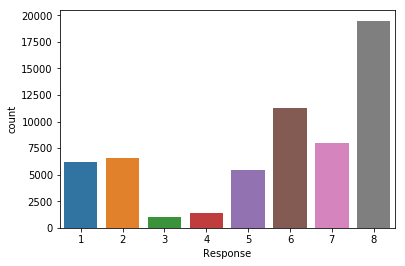

In [0]:
sns.countplot('Response',data=df_train)

In [0]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
#
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#
from sklearn.pipeline import Pipeline
#
from sklearn.utils import resample

#### Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
#
import warnings
warnings.filterwarnings("ignore")

D:\Users\Plaban_Nayak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# DATA NORMALIZATION

In [0]:
X = X.astype('float32')

In [0]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 144 entries, Product_Info_1 to E1
dtypes: float32(144)
memory usage: 32.6 MB


In [0]:
scaled = StandardScaler()
X_scaled = scaled.fit_transform(X)

In [0]:
X_scaled.shape

(59381, 144)

In [0]:
X_scaled

array([[-0.16452547, -2.84173109, -0.89194891, ...,  1.77381744,
        -0.47181684, -0.21600075],
       [-0.16452547,  0.312319  , -0.89194891, ..., -0.56375587,
        -0.47181684, -0.21600075],
       [-0.16452547,  0.312319  , -0.89194891, ..., -0.56375587,
        -0.47181684,  4.62961345],
       ...,
       [-0.16452547,  0.312319  , -0.89194891, ..., -0.56375587,
        -0.47181684,  4.62961345],
       [-0.16452547, -2.84173109, -0.34747581, ..., -0.56375587,
        -0.47181684, -0.21600075],
       [-0.16452547,  0.312319  , -0.89194891, ..., -0.56375587,
        -0.47181684, -0.21600075]])

# TRAIN TEST SPLIT the input data set

In [0]:
Y = df_train['Response'].values

In [0]:
Y.shape

(59381,)

In [0]:
#train test split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=1)

print('training data set shape : ',X_train.shape)
print('test data set shape : ',X_test.shape)

training data set shape :  (47504, 144)
test data set shape :  (11877, 144)


In [0]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
predict = lr.predict(X_test)

In [0]:
accuracy_score(y_test,predict)

0.49608486991664563

In [0]:
# Spot Check some Classification  Algorithms
models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))

# Test options and evaluation metric
num_folds =10
seed = 1
scoring = 'accuracy'

# evaluate each model in turn
results = []
names = []

for name,model in models:
    kfold = KFold(n_splits=num_folds,random_state=1)
    cv_results = cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f"{name} - results(mean) : {cv_results.mean():f} -results(std): {cv_results.std():f}"
    print(msg) 

LR - results(mean) : 0.506842 -results(std): 0.006441
KNN - results(mean) : 0.394177 -results(std): 0.004410
DT - results(mean) : 0.442847 -results(std): 0.005385
NB - results(mean) : 0.343066 -results(std): 0.007647


# Visualize the Comparison of algorithms using Box Plot

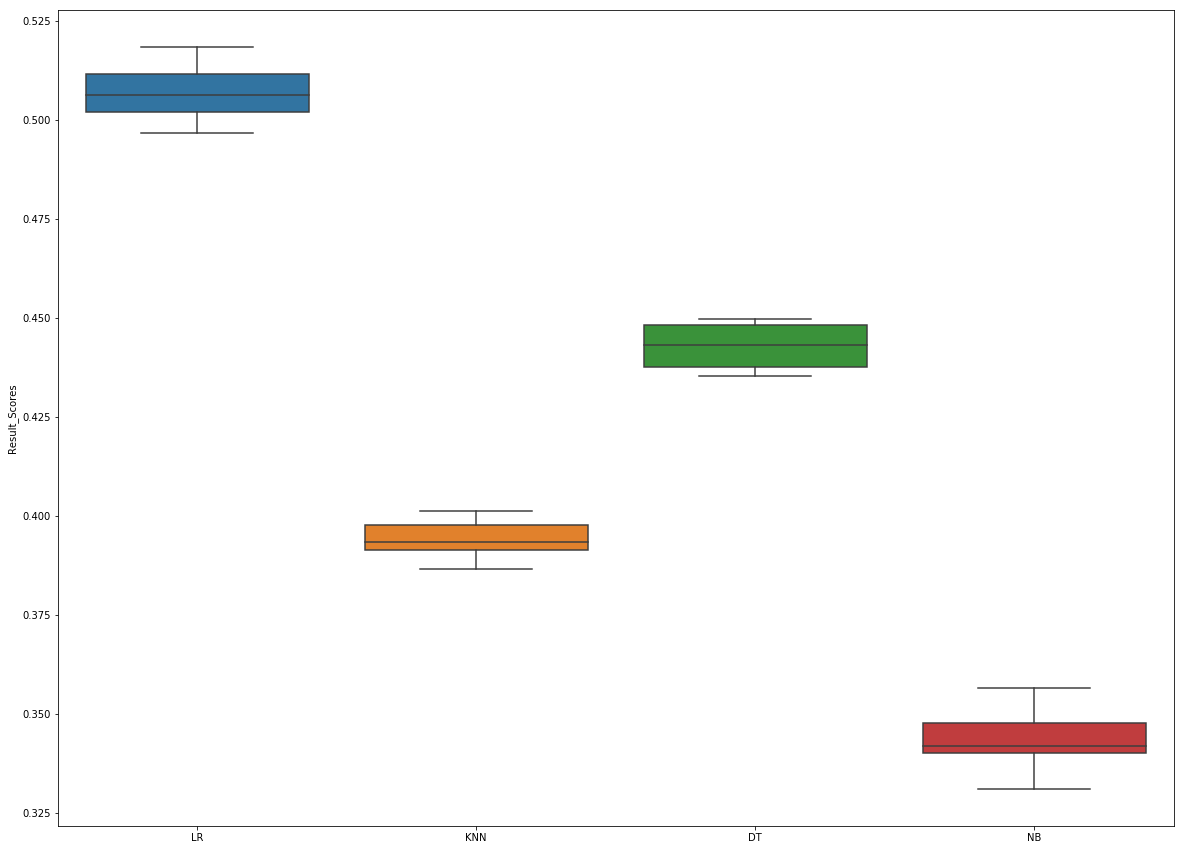

In [0]:
plt.figure(figsize=(20,15))
sns.boxplot(x=names, y=results)
plt.ylabel('Result_Scores')
plt.show()

#### Logistic Regression has better accuracy as compared to other algorithms but the accuracy is only 50.6%

# Comparing ensemble algorithms

#### What is an ensemble method?


The idea here is to train multiple models, each with the objective to predict or classify a set of results.

Most of the errors from a model’s learning are from three main factors:

* variance, 

* noise, and 

* bias. 


By using ensemble methods, we are able to increase the stability of the final model and reduce the errors mentioned previously. By combining many models, we’re able to (mostly) reduce the variance, even when they are individually not great, as we won’t suffer from random errors from a single source.

The main principle behind ensemble modelling is to group weak learners together to form one strong learner.

From many, together they emerge as one.

#### There are three main terms describing the ensemble (combination) of various models into one more effective model:

* Bagging to decrease the model’s variance;

* Boosting to decreasing the model’s bias, and;

* Stacking to increasing the predictive force of the classifier.



In [0]:
# Compare Algorithms

pipelines = []
pipelines.append(("AB",
                  Pipeline([("AB", AdaBoostClassifier())])))
pipelines.append(("GBM",
                  Pipeline([("GBM", GradientBoostingClassifier())])))
pipelines.append(("RF",
                  Pipeline([("RF", RandomForestClassifier())])))
pipelines.append(("ET",
                  Pipeline([("ET", ExtraTreesClassifier())])))

results = []
names = []

#
for name,model in pipelines:
    kfold = KFold(n_splits = num_folds,random_state=1)
    cv_results = cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = f"{name} - results(mean) : {cv_results.mean():f} -results(std): {cv_results.std():f}"
    print(msg)

AB - results(mean) : 0.511704 -results(std): 0.006959
GBM - results(mean) : 0.573320 -results(std): 0.004510
RF - results(mean) : 0.511620 -results(std): 0.006809
ET - results(mean) : 0.483223 -results(std): 0.004896


In [0]:
pipelines

[('AB', Pipeline(memory=None,
       steps=[('AB', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
            learning_rate=1.0, n_estimators=50, random_state=None))])),
 ('GBM', Pipeline(memory=None,
       steps=[('GBM', GradientBoostingClassifier(criterion='friedman_mse', init=None,
                learning_rate=0.1, loss='deviance', max_depth=3,
                max_features=None, max_leaf_nodes=None,
                min_impurity_decrease=0.0, min_impurity_split=None,
                min_samples_leaf=1, min_samples_split=2,
                min_weight_fraction_leaf=0.0, n_estimators=100,
                presort='auto', random_state=None, subsample=1.0, verbose=0,
                warm_start=False))])),
 ('RF', Pipeline(memory=None,
       steps=[('RF', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
        

# Compare Algorithms - Visualization

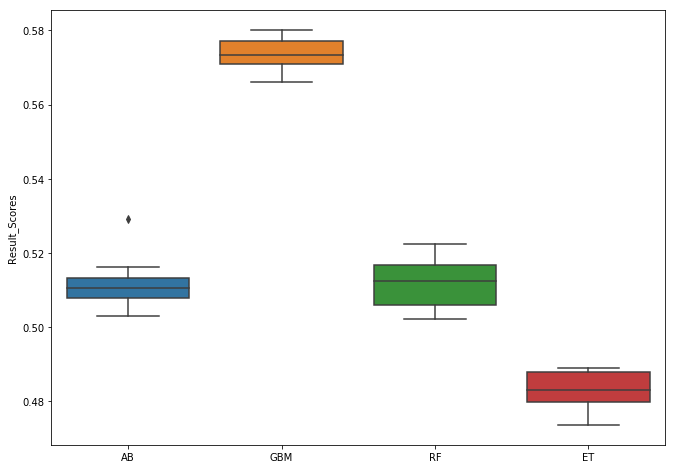

In [0]:
plt.figure(figsize=(11,8))
sns.boxplot(x=names, y=results)
plt.ylabel('Result_Scores')
plt.show()

#### Note GBM classifier has the best accuracy as compared to other Ensemble techniques

# Using XGBOOSTClassifier Boosting Method of Ensemble model

In [0]:
from xgboost.sklearn import XGBClassifier
#set the parameters for the xgbosst model
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': 1.0,
    'silent': 1.0,
    'n_estimators': 5
}
params['eval_metric'] = ['logloss', 'auc']

# Train the XGBClassifier model

In [0]:
bst = XGBClassifier(**params).fit(X_train,y_train)

# Predict the Response

In [0]:
y_pred = bst.predict(X_test)

In [0]:
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Classification report")
print(classification_report(y_test, y_pred))

Accuracy score: 0.5232802896354298
Classification report
             precision    recall  f1-score   support

          1       0.42      0.16      0.23      1280
          2       0.45      0.17      0.24      1326
          3       0.56      0.45      0.50       194
          4       0.57      0.70      0.63       283
          5       0.52      0.57      0.55      1122
          6       0.38      0.42      0.40      2206
          7       0.41      0.27      0.33      1608
          8       0.62      0.91      0.74      3858

avg / total       0.49      0.52      0.48     11877



<Figure size 1440x792 with 0 Axes>

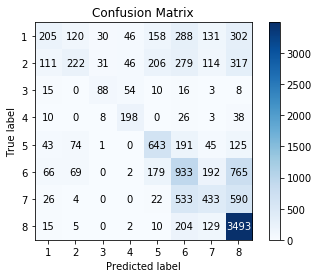

In [0]:
import scikitplot

scikitplot.metrics.plot_confusion_matrix(y_test,y_pred)

# Choose Optimal Features

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
select_feature = SelectKBest(chi2,k=5)
X_train,X_test,y_train,y_test = train_test_split(X, df_train['Response'],test_size=0.2,random_state=1)
select_feature.fit(X_train,y_train)
print("Feature_List : ",X_train.columns)
print("Features Scores : ",np.round(np.array(select_feature.scores_),2))

Feature_List :  Index(['Product_Info_1', 'Product_Info_3', 'Product_Info_4', 'Product_Info_5',
       'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht', 'Wt', 'BMI',
       ...
       'B2', 'C1', 'C2', 'C3', 'C4', 'D1', 'D2', 'D3', 'D4', 'E1'],
      dtype='object', length=144)
Features Scores :  [3.2200000e+00 4.9594000e+02 5.7789000e+02 1.2000000e-01 2.0560000e+01
 1.6700000e+00 3.2291000e+02 9.4900000e+00 2.8279000e+02 3.9162000e+02
 2.5710000e+01 1.2660600e+03 3.9958000e+02 1.1790000e+01 2.3810000e+01
 1.0222000e+02 8.9820000e+01 1.5600000e+00 1.2530000e+01 3.0800000e+00
 2.9140000e+01 3.6131000e+02 3.9740000e+01 2.5600000e+01 7.7430000e+01
 1.4501000e+02 1.5005000e+02 4.8000000e-01 1.4829000e+02 1.2690000e+01
 3.3190000e+01 5.3820000e+01 1.1480000e+01 1.8900000e+00 3.3630000e+01
 8.8000000e-01 7.6506200e+03 2.9650200e+03 6.0000000e+00 9.4755000e+02
 2.7200000e+00 9.6600000e+01 1.0000000e+00 6.3300000e+00 2.9690000e+01
 1.6825570e+04 3.0000000e-01 7.0000000e+00 1.3518000e+02 7.20

In [0]:
X_train_2 = select_feature.transform(X_train)
X_train_2.shape

(47504, 5)

In [0]:
X_test_2 = select_feature.transform(X_test)
X_test_2.shape

(11877, 5)

In [0]:
from sklearn.multiclass import OneVsRestClassifier
from imblearn.metrics import classification_report_imbalanced
from imblearn.metrics import classification_report_imbalanced
classifiers = {'RandomForestClassifier':RandomForestClassifier(),
               'GradientBoostingClassifier':GradientBoostingClassifier(),
               'ExtraTreesClassifier':ExtraTreesClassifier(),
               'AdaBoostClassifier':AdaBoostClassifier(),
               'LogisticRegression':LogisticRegression()}
for keys,items in classifiers.items():
  classifier = OneVsRestClassifier(items)

  # train
  classifier.fit(X_train_2, y_train)

  # predict
  predictions = classifier.predict(X_test_2)
  
  print("Accuracy_Score for {} model : {}".format(keys,accuracy_score(y_test,predictions)))
  print("="*80)
  print("classification_report_imbalanced")
  print(classification_report_imbalanced(y_test, predictions))
  print("="*80)   
 


Accuracy_Score for RandomForestClassifier model : 0.38401953355224383
classification_report_imbalanced
                   pre       rec       spe        f1       geo       iba       sup

          1       0.22      0.09      0.96      0.13      0.30      0.08      1280
          2       0.15      0.03      0.98      0.05      0.16      0.02      1326
          3       0.22      0.11      0.99      0.14      0.33      0.10       194
          4       0.37      0.55      0.98      0.44      0.73      0.52       283
          5       0.12      0.02      0.99      0.03      0.14      0.02      1122
          6       0.28      0.16      0.90      0.21      0.38      0.14      2206
          7       0.25      0.19      0.91      0.21      0.41      0.16      1608
          8       0.45      0.92      0.46      0.60      0.65      0.44      3858

avg / total       0.30      0.38      0.79      0.30      0.42      0.22     11877

Accuracy_Score for GradientBoostingClassifier model : 0.39942746

In [0]:
from sklearn.feature_selection  import RFECV
rf = RandomForestClassifier()
rfecv = RFECV(estimator=rf,step=1,cv=5,scoring='accuracy')
rfecv = rfecv.fit(X_train,y_train)
print("Optimal Number of Features : ",rfecv.n_features_)
print("Best Features : ",X_train.columns[rfecv.support_])

In [0]:
#!pip install imbalanced-learn
#conda install -c conda-forge imbalanced-learn

  Found existing installation: scikit-learn 0.19.1
    Uninstalling scikit-learn-0.19.1:


fbprophet 0.4.post2 requires setuptools-git>=1.2, which is not installed.
Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'd:\\users\\plaban_nayak\\appdata\\local\\continuum\\anaconda3\\lib\\site-packages\\sklearn\\ensemble\\_gradient_boosting.cp36-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# SMOTE (Synthetic Minority Over-sampling Technique)

SMOTE is an over-sampling method. It creates synthetic samples of the minority class.

In [0]:
from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
x_sm,y_sm =smote.fit_sample(X_train,y_train)
print(x_sm.shape,y_sm.shape)

(62316, 144) (62316,)


In [0]:
from sklearn.multiclass import OneVsRestClassifier
from imblearn.metrics import classification_report_imbalanced
from imblearn.metrics import classification_report_imbalanced
classifiers = {'RandomForestClassifier':RandomForestClassifier(),
               'GradientBoostingClassifier':GradientBoostingClassifier(),
               'ExtraTreesClassifier':ExtraTreesClassifier(),
               'AdaBoostClassifier':AdaBoostClassifier(),
               'LogisticRegression':LogisticRegression()}
for keys,items in classifiers.items():
  classifier = OneVsRestClassifier(items)

  # train
  classifier.fit(x_sm, y_sm)

  # predict
  predictions = classifier.predict(X_test)
  
  print("Accuracy_Score for {} model : {}".format(keys,accuracy_score(y_test,predictions)))
  print("="*80)
  print("classification_report_imbalanced")
  print(classification_report_imbalanced(y_test, predictions))
  print("="*80)   

Accuracy_Score for RandomForestClassifier model : 0.5242906457859728
classification_report_imbalanced
                   pre       rec       spe        f1       geo       iba       sup

          1       0.41      0.16      0.97      0.23      0.39      0.14      1280
          2       0.37      0.20      0.96      0.26      0.44      0.18      1326
          3       0.35      0.53      0.98      0.42      0.72      0.49       194
          4       0.54      0.36      0.99      0.43      0.60      0.33       283
          5       0.56      0.46      0.96      0.51      0.67      0.42      1122
          6       0.43      0.45      0.87      0.44      0.62      0.37      2206
          7       0.39      0.37      0.91      0.38      0.58      0.32      1608
          8       0.63      0.89      0.75      0.74      0.82      0.68      3858

avg / total       0.50      0.52      0.87      0.49      0.64      0.42     11877

Accuracy_Score for GradientBoostingClassifier model : 0.555780079

In [0]:
# Create a pipeline
pipeline = make_pipeline(NearMiss(version=2),
                         LinearSVC(random_state=RANDOM_STATE))
pipeline.fit(X_train, y_train)

# Classify and report the results
print(classification_report_imbalanced(y_test, pipeline.predict(X_test)))